Вывод столбцов согласно 1 условию.
Страна: France, год: 2018, используемая технология: Traditional Rocket.
Страна: France, год: 2013, используемая технология: Traditional Rocket.
Страна: France, год: 2003, используемая технология: Nuclear Propulsion.
Страна: France, год: 2018, используемая технология: Traditional Rocket.
Страна: France, год: 2013, используемая технология: Traditional Rocket.
Страна: France, год: 2003, используемая технология: Nuclear Propulsion.
Страна: France, год: 2018, используемая технология: Traditional Rocket.
Страна: France, год: 2013, используемая технология: Traditional Rocket.
Страна: France, год: 2003, используемая технология: Nuclear Propulsion.
Страна: France, год: 2018, используемая технология: Traditional Rocket.
Страна: France, год: 2013, используемая технология: Traditional Rocket.
Страна: France, год: 2003, используемая технология: Nuclear Propulsion.
Страна: France, год: 2018, используемая технология: Traditional Rocket.
Страна: France, год: 2013, ис

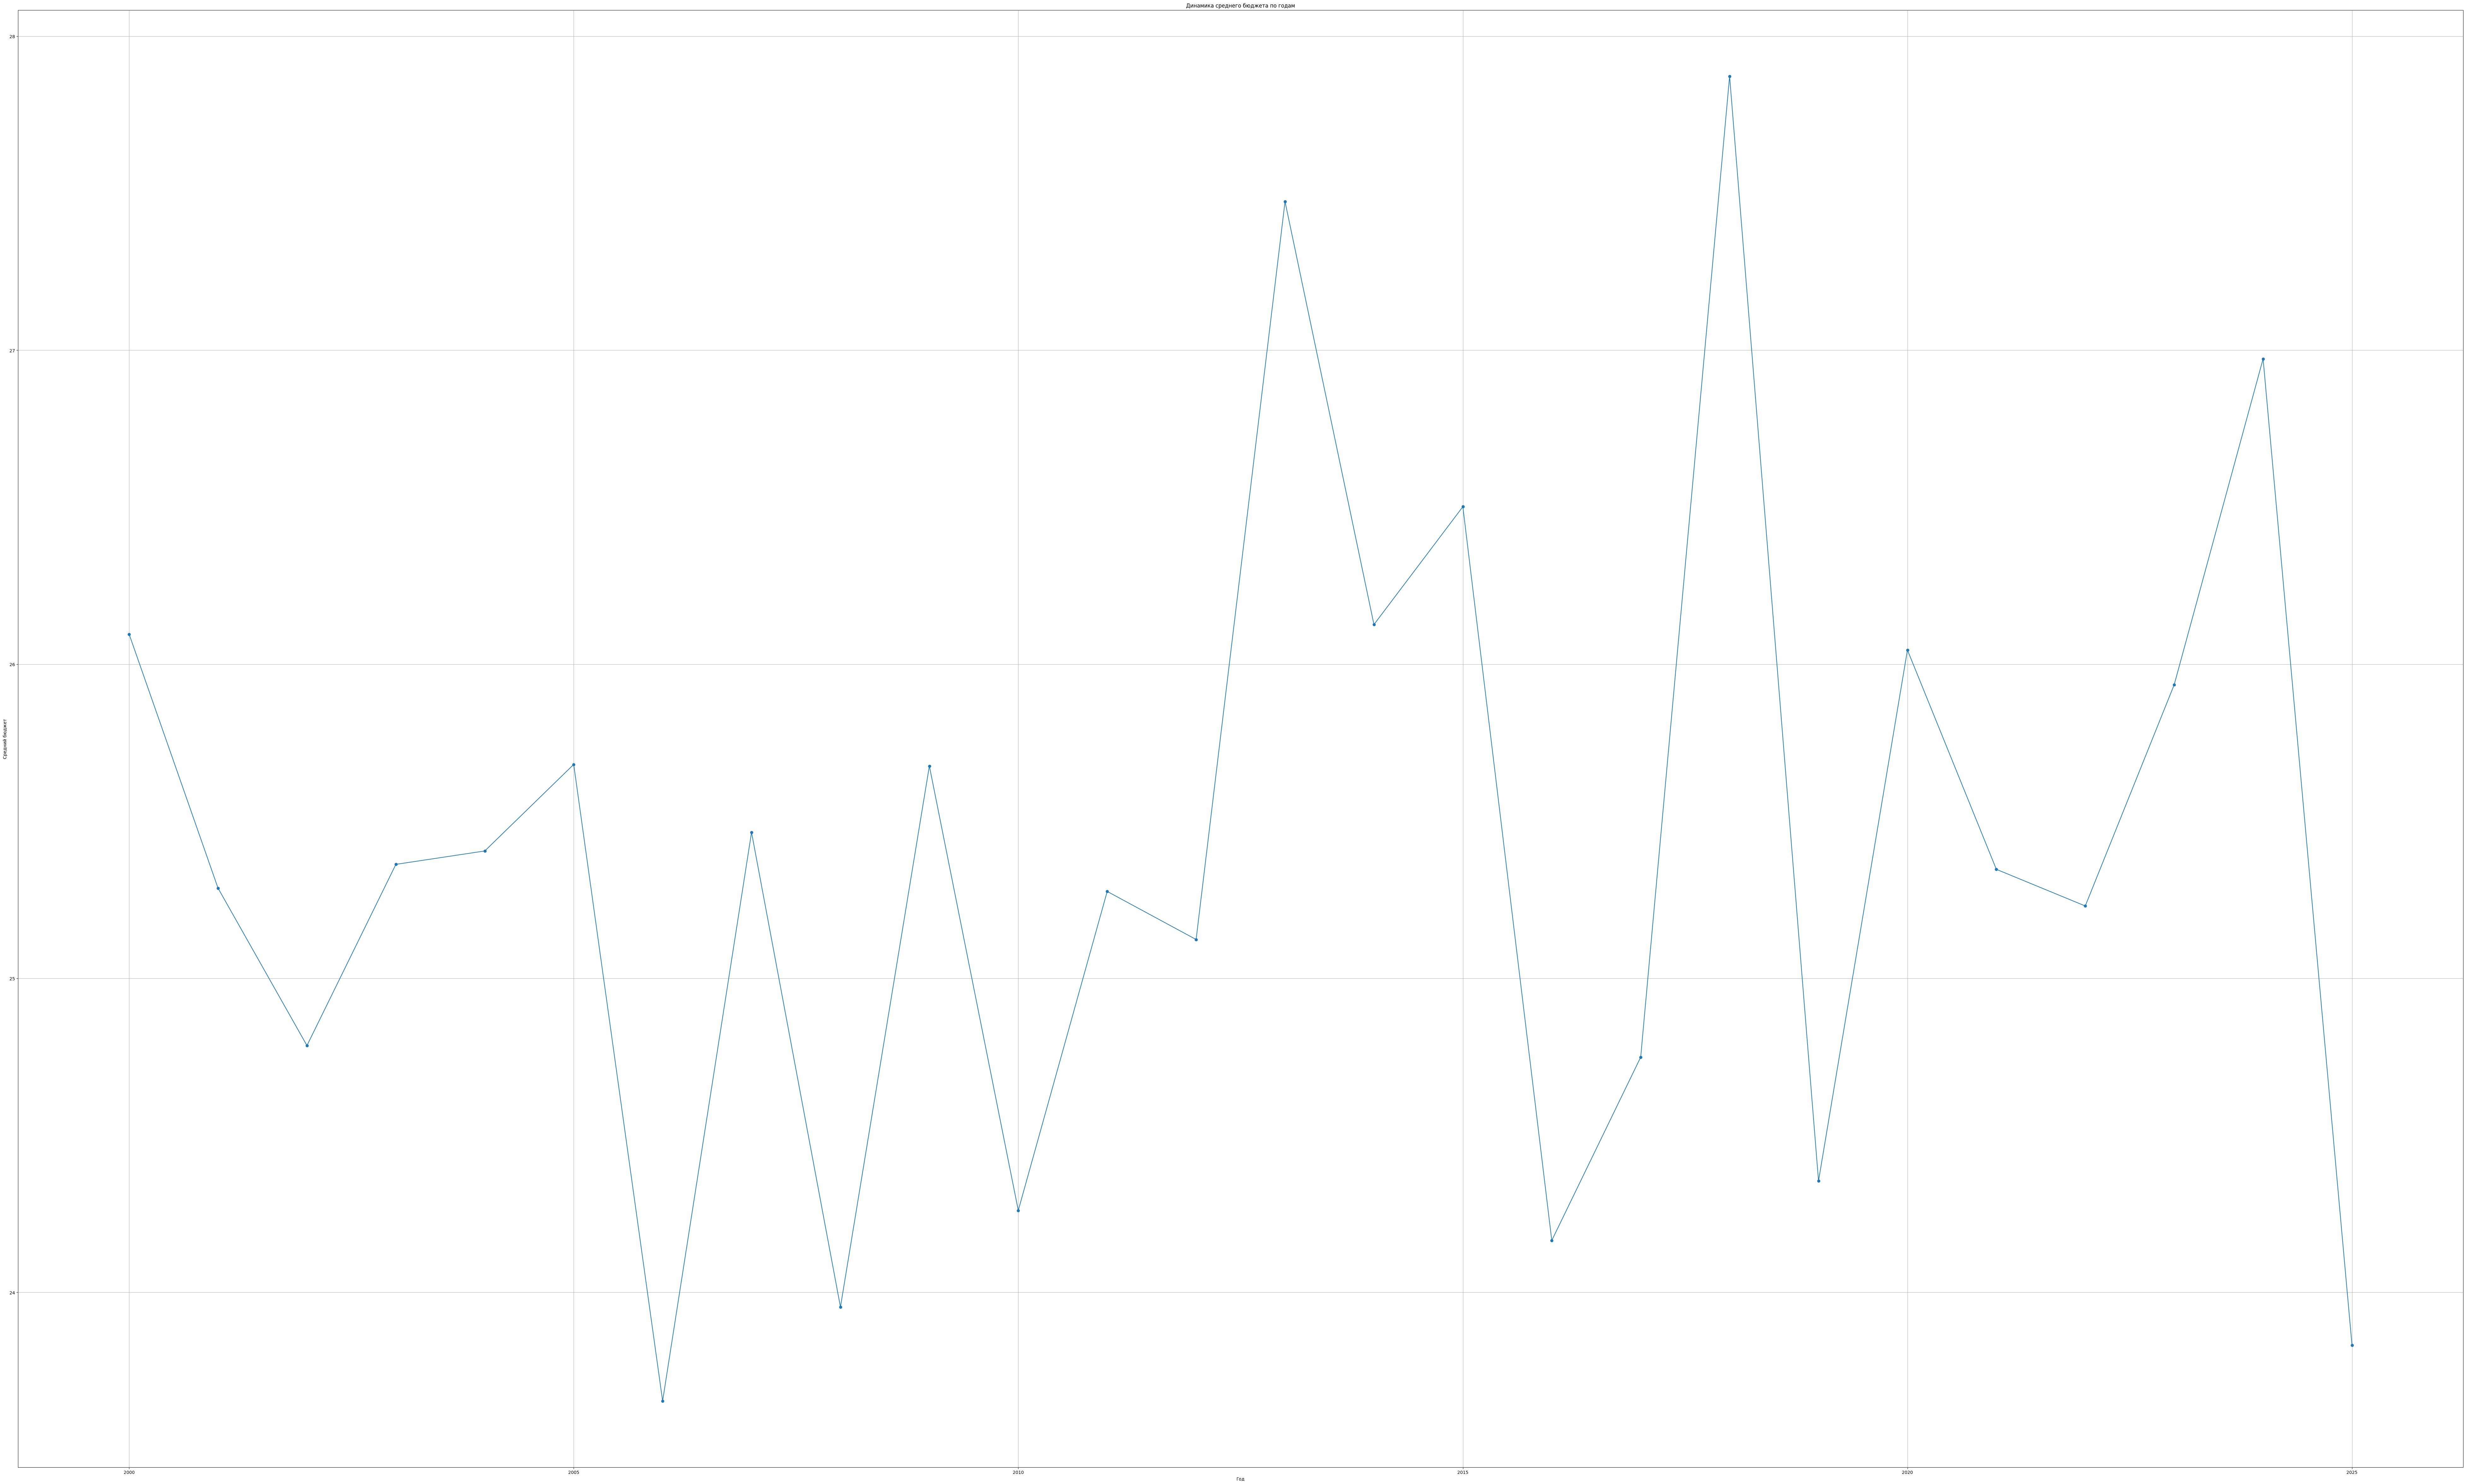


Вывод суммы.
Год: 2024, бюджет: 223766.23999999912


In [25]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Подключение к базе данных SQLite
conn = sqlite3.connect('hw.db')
cursor = conn.cursor()

# Создание таблицы
cursor.execute (''' CREATE TABLE IF NOT EXISTS Space(
  id INTEGER PRIMARY KEY,
  Country TEXT,
  Year INTEGER,
  'Mission Name' TEXT,
  'Mission Type' TEXT,
  'Launch Site' TEXT,
  'Satellite Type' TEXT,
  'Budget (in Billion $)' FLOAT,
  'Success Rate (%)' INTEGER,
  'Technology Used' TEXT,
  'Environmental Impact' TEXT,
  'Collaborating Countries' TEXT,
  'Duration (in Days)' INTEGER
)
''')

#импорт данных в бд из датасета
df = pd.read_csv ('Global_Space_Dataset.csv')
df.to_sql('Space', conn, if_exists='append', index=False)

#вывод столбцов в соответствии с условием
print (f"Вывод столбцов согласно 1 условию.")
cursor.execute ("""
SELECT Country, Year, "Technology Used"
FROM Space
WHERE "Mission Type" = 'Manned' and "Success Rate (%)" > 99 and Country = 'France'
""")
result = cursor.fetchall()
for row in result:
    print(f"Страна: {row[0]}, год: {row[1]}, используемая технология: {row[2]}.")

#вывод столбцов в соответствии с условием
print (f"\nВывод столбцов согласно 2 условию.")
cursor.execute ("""
SELECT Year, "Mission Name", "Success Rate (%)"
FROM Space
WHERE ("Budget (in Billion $)" BETWEEN 10 and 20) and "Collaborating Countries" LIKE 'Russia'
""")
result = cursor.fetchall()
for row in result:
    print(f"Год: {row[0]}, название миссии: {row[1]}, успех: {row[2]} %.")

#подчет среднего значения
print (f"\nВывод графика динамики среднего бюджета по годам.")
query = ("""
SELECT Year, AVG ("Budget (in Billion $)") as avg_budget
FROM Space
GROUP BY Year
ORDER BY Year
""")
df = pd.read_sql(query, conn)
# Создаем линейный график
plt.figure(figsize=(100, 60))
plt.plot(df['Year'], df['avg_budget'], marker='o')
plt.title('Динамика среднего бюджета по годам')
plt.xlabel('Год')
plt.ylabel('Средний бюджет')
plt.grid(True)
plt.show()

#подсчет суммы
print (f"\nВывод суммы.")
cursor.execute ("""
SELECT Year, SUM ("Budget (in Billion $)")
FROM Space
WHERE Year = 2024
""")
result = cursor.fetchall()
for row in result:
    print(f"Год: {row[0]}, бюджет: {row[1]}")

# Закрытие соединения
conn.commit()
conn.close()